In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
tts = train_test_split
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
df = pd.read_csv('data/Fish.csv')

In [37]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]

In [38]:
fish_target = df.loc[cond, ['Species']]
train_input, test_input, train_target, test_target = tts(fish_data, fish_target)
# input 먼저                   target 나중

In [39]:
test_target.head(3)

,Species
4,Bream
3,Bream
158,Smelt


In [40]:
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [41]:
kn.score(test_input, test_target['Species'])

1.0

In [43]:
kn.predict([[25,150]])

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

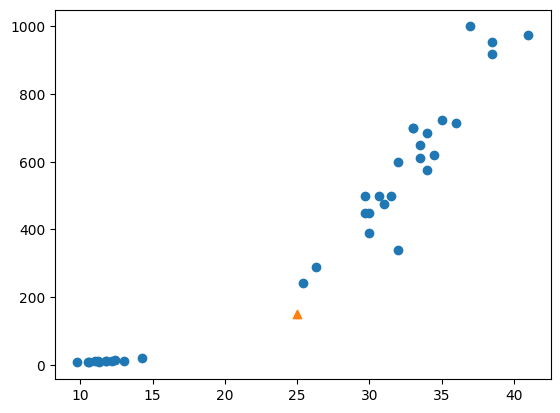

In [44]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight']) # 전체 출력
plt.scatter(25, 150, marker='^')

In [45]:
kn.kneighbors([[25, 150]])

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.73859415, 137.17988191, 138.32150953,
         138.39320793]]),
 array([[ 4, 26, 35,  7, 12]]))

In [48]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std) # 표준편차

Length2     25.825000
Weight     408.133333
dtype: float64
Length2     10.613829
Weight     332.057132
dtype: float64


In [50]:
# 표준편차로 나눠달라고 하면...
train_scaled = (train_input - mean) / std # 표준편차 구하는 공식 그대로 따라한 것임을 참고

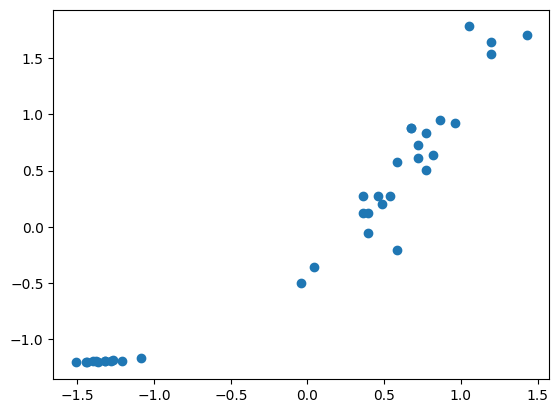

In [55]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])
# 산점도를 눈으로 보는 사람 입장에서 간격이 동일해진다 = 표준점수화 시켰다

In [54]:
kn.fit(train_scaled, train_target['Species']) # 여기도 표준점수화 시켰다

KNeighborsClassifier()

In [56]:
test_scaled = (test_input - mean) / std # 테스트도 표준점수화 시킨다

In [57]:
kn.score(test_scaled, test_target['Species'])

1.0

ValueError: x and y must be the same size

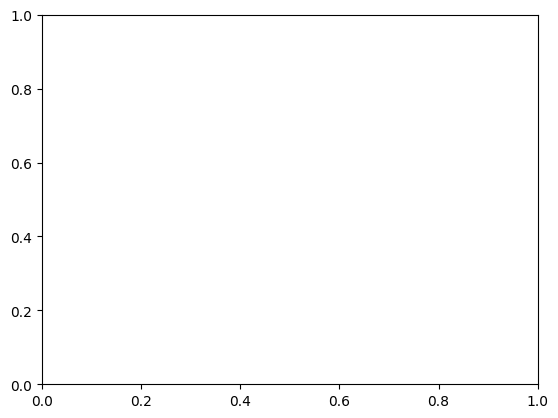

In [64]:
plt.scatter(test_scaled['Length2'], train_scaled['Weight']) # 전체 출력
# plt.scatter(25, 150, marker='^') 이것도 표준점수화 시켜줘야 한다
new = (([25, 150]) - mean) / std
kn.predict([new])